<a href="https://colab.research.google.com/github/Bhuvanchandram/ML_Manual/blob/main/Labprograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

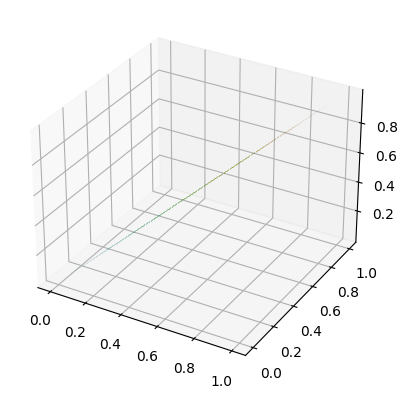

In [ ]:
#Question 1a
#Visualize the n-dimensional data using 3D surface plots.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D surface plot of the n-dimensional data
def plot_surface(data):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(data, Y=data, Z=data, cmap='jet')
  plt.show()

# Generate some n-dimensional data
data = np.random.rand(100, 10)

# Plot the data as a 3D surface plot
plot_surface(data)

In [ ]:
#Question 1b
#Write a Python program to implement the Best First Search (BFS) algorithm.
import heapq

def best_first_search(graph, start, goal):
    # Initialize the priority queue with the start node
    frontier = [(0, start)]
    # Initialize the explored set
    explored = set()

    # Loop until the frontier is empty
    while frontier:
        # Pop the node with the highest priority
        (cost, current_node) = heapq.heappop(frontier)

        # Check if the current node is the goal
        if current_node == goal:
            return cost

        # Add the current node to the explored set
        explored.add(current_node)
        print(f"Explored node: {current_node}")

        # Explore the neighbors of the current node
        for neighbor, neighbor_cost in graph[current_node]:
            # Check if the neighbor is not in the explored set and not in the frontier
            if neighbor not in explored and neighbor not in [node[1] for node in frontier]:
                # Add the neighbor to the frontier with its priority being its heuristic cost
                heapq.heappush(frontier, (neighbor_cost+cost, neighbor))
                print(f"Added node {neighbor} to frontier with cost {neighbor_cost}")

    # If the goal cannot be reached, return None
    return None

# Example graph
graph = {
    'A': [('B', 5), ('C', 6)],
    'B': [('D', 4), ('E', 7)],
    'C': [('F', 9), ('G', 8)],
    'D': [('H', 3)],
    'E': [('I', 6)],
    'F': [('J', 5)],
    'G': [('K', 7)],
    'H': [('L', 1)],
    'I': [('M', 2)],
    'J': [('N', 3)],
    'K': [('O', 4)],
    'L': [],
    'M': [],
    'N': [],
    'O': [('P', 1)],
    'P': []
}

# Get start and goal nodes from the user
start = input("Enter the start node: ")
goal = input("Enter the goal node: ")

# Run the Best First Search algorithm
result = best_first_search(graph, start, goal)

# Print the result
if result is not None:
    print(f"The minimum cost from {start} to {goal} is {result}.")
else:
    print(f"There is no path from {start} to {goal}.")

Enter the start node: A
Enter the goal node: C
Explored node: A
Added node B to frontier with cost 5
Added node C to frontier with cost 6
Explored node: B
Added node D to frontier with cost 4
Added node E to frontier with cost 7
The minimum cost from A to C is 6.


In [ ]:
#Question 2a
#Visualize the n-dimensional data using contour plots.
import numpy as np
import matplotlib.pyplot as plt

def contour_plot(data, n):
  # Create a meshgrid of the data.
  x, y = np.meshgrid(*data.T)

  # Create a contour plot of the data.
  plt.contour(x, y, data, n)

  # Plot the contour plot.
  plt.show()

if __name__ == "__main__":
  # Generate some n-dimensional data.
  data = np.random.rand(10, 10, 10)

  # Visualize the data using contour plots.
  for i in range(data.shape[0]):
    contour_plot(data[i], data.shape[0])


In [ ]:
#Question 2b
#Write a program to implement the A* algorithm
import heapq

def a_star(graph, start, goal, heuristic):
    # Initialize the priority queue with the start node
    frontier = [(0 + heuristic[start], start)]
    # Initialize the cost dictionary with the start node
    cost = {start: 0}
    # Initialize the parent dictionary with the start node
    parent = {start: None}
    # Initialize the explored set
    explored = set()

    # Loop until the frontier is empty
    while frontier:
        # Pop the node with the lowest f-score
        (f_score, current_node) = heapq.heappop(frontier)

        # Check if the current node is the goal
        if current_node == goal:
            # Reconstruct the path from the goal to the start
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parent[current_node]
            path.reverse()
            return (path, cost[goal])

        # Add the current node to the explored set
        explored.add(current_node)

        # Explore the neighbors of the current node
        for neighbor, neighbor_cost in graph[current_node]:
            # Calculate the tentative g-score
            tentative_g_score = cost[current_node] + neighbor_cost
            # Check if the neighbor is already in the explored set
            if neighbor in explored:
                # If the tentative g-score is higher than the current g-score, skip this neighbor
                if tentative_g_score >= cost.get(neighbor, float('inf')):
                    continue

            # Check if the neighbor is not in the frontier or the tentative g-score is lower than the current g-score
            if neighbor not in [node[1] for node in frontier] or tentative_g_score < cost.get(neighbor, float('inf')):
                # Update the cost and parent dictionaries
                cost[neighbor] = tentative_g_score
                parent[neighbor] = current_node
                # Add the neighbor to the frontier with its priority being its f-score
                heapq.heappush(frontier, (tentative_g_score + heuristic[neighbor], neighbor))

    # If the goal cannot be reached, return None
    return None

# Example graph
graph = {
    'A': [('B', 5), ('C', 6)],
    'B': [('D', 4), ('E', 7)],
    'C': [('F', 9), ('G', 8)],
    'D': [('H', 3)],
    'E': [('I', 6)],
    'F': [('J', 5)],
    'G': [('K', 7)],
    'H': [('L', 1)],
    'I': [('M', 2)],
    'J': [('N', 3)],
    'K': [('O', 4)],
    'L': [],
    'M': [],
    'N': [],
    'O': [('P', 1)],
    'P': []
}

# Heuristic function
heuristic = {
    'A': 10,
    'B': 8,
    'C': 7,
    'D': 6,
    'E': 8,
    'F': 3,
    'G': 2,
    'H': 5,
    'I': 6,
    'J': 3,
    'K': 2,
    'L': 1,
    'M': 4,
    'N': 2,
    'O': 4,
    'P': 0
}

# Get start and goal nodes from the user
start = input("Enter the start node: ")
goal = input("Enter the goal node: ")

# Run the Best First Search algorithm
result = a_star(graph, start, goal,heuristic)

# Print the result
if result is not None:
    print(f"The minimum cost from {start} to {goal} is {result}.")
else:
    print(f"There is no path from {start} to {goal}.")


Enter the start node: A
Enter the goal node: C
The minimum cost from A to C is (['A', 'C'], 6).


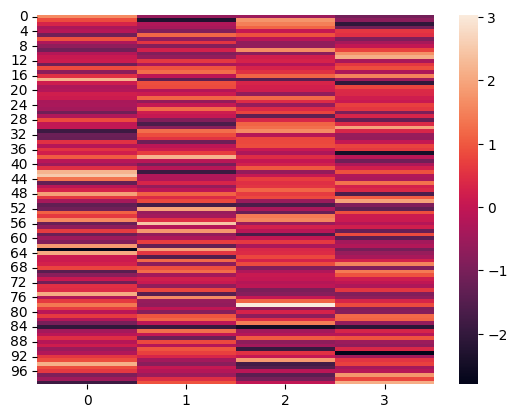

In [ ]:
#Question 3a
#Visualize the n-dimensional data using heat-map.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
# create some sample data
np.random.seed(1)
n = 100
data = np.random.randn(n, 4)
# create a heat map using Seaborn
sns.heatmap(data)
plt.show()

In [ ]:
#Question 3b
#Write a program to implement Min-Max algorithm.
class Tree:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children

    def __repr__(self):
        return 'Tree({0},{1})'.format(self.value, self.children)

# Define the game tree using the Tree data structure
game_tree = Tree(0, [
    Tree(0, [
        Tree(3),
        Tree(12)
    ]),
    Tree(0, [
        Tree(8),
        Tree(2)
    ])
])

# Define the Minimax algorithm function with solution path
def minimax(node, depth, maximizing_player):
    # Check if the node is a leaf or if the maximum depth has been reached
    if depth == 0 or not node.children:
        return node.value, [node.value]
    # Apply the Minimax algorithm
    if maximizing_player:
        max_value = float("-inf")
        max_path = []
        for child_node in node.children:
            child_value, child_path = minimax(child_node, depth - 1, False)
            if child_value > max_value:
                max_value = child_value
                max_path = [node.value] + child_path
        return max_value, max_path
    else:
        min_value = float("inf")
        min_path = []
        for child_node in node.children:
            child_value, child_path = minimax(child_node, depth - 1, True)
            if child_value < min_value:
                min_value = child_value
                min_path = [node.value] + child_path
        return min_value, min_path

# Example usage:
optimal_value, optimal_path = minimax(game_tree, 2, True)
print("Optimal value:", optimal_value)
print("Optimal path:", optimal_path)



Optimal value: 3
Optimal path: [0, 0, 3]


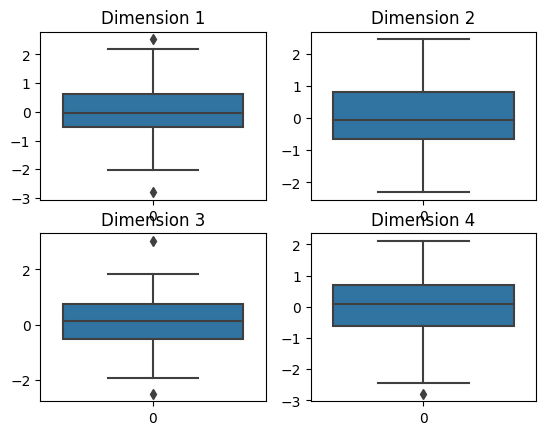

In [ ]:
#Question 4a
#Visualize the n-dimensional data using Box-plot.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

# create some sample data
np.random.seed(1)
n = 100
data = np.random.randn(n, 4)

# create a box plot for each dimension
for i in range(4):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data[:, i])
    plt.title('Dimension {}'.format(i + 1))

# create a figure for plotly
fig = go.Figure()
for i in range(4):
    fig.add_trace(go.Box(x=data[:, i]))

# show the figures
plt.show()

In [ ]:
#Question 4b
#Write a program to implement Alpha-beta pruning algorithm.
class Node:
    def __init__(self, value):
        self.value = value
        self.children = []
        self.alpha = float('-inf')
        self.beta = float('inf')

    def add_child(self, child_node):
        self.children.append(child_node)

    def is_leaf(self):
        return not self.children

def min_max_with_ab_pruning(node, depth, alpha, beta, maximizing_player):
    if depth == 0 or node.is_leaf():
        return node.value

    if maximizing_player:
        max_eval = float('-inf')
        best_child = None

        for child in node.children:
            child_eval = min_max_with_ab_pruning(child, depth-1, alpha, beta, False)
            if child_eval > max_eval:
                max_eval = child_eval
                best_child = child

            alpha = max(alpha, max_eval)
            if alpha >= beta:
                break

        node.alpha = max_eval
        if node.alpha >= node.beta:
            pruned_nodes.append(node)

        return max_eval

    else:
        min_eval = float('inf')
        best_child = None

        for child in node.children:
            child_eval = min_max_with_ab_pruning(child, depth-1, alpha, beta, True)
            if child_eval < min_eval:
                min_eval = child_eval
                best_child = child

            beta = min(beta, min_eval)
            if alpha >= beta:
                break

        node.beta = min_eval
        if node.alpha >= node.beta:
            pruned_nodes.append(node)

        return min_eval


# Create the example tree
root = Node(0)
node_b = Node(3)
node_c = Node(-3)
node_d = Node(2)
node_e = Node(1)
node_f = Node(-2)
node_g = Node(5)
node_h = Node(-5)

root.add_child(node_b)
root.add_child(node_c)
node_b.add_child(node_d)
node_b.add_child(node_e)
node_b.add_child(node_f)
node_d.add_child(node_g)
node_d.add_child(node_h)

# Initialize variables
pruned_nodes = []
maximizing_player = True

# Run the algorithm with alpha-beta pruning and get the optimal value and path
optimal_value = min_max_with_ab_pruning(root, 5, float('-inf'), float('inf'), maximizing_player)

# Print the optimal value and path
print("Optimal value:", optimal_value)
path = [root]
current_node = root
while current_node.children:
    if maximizing_player:
        current_node = max(current_node.children, key=lambda x: x.alpha)
        maximizing_player = False
    else:
        current_node = min(current_node.children, key=lambda x: x.beta)
        maximizing_player = True
    path.append(current_node)

print("Solution path:")
for node in path:
    print(node.value)

# Print the pruned nodes
if pruned_nodes:
    print("Pruned nodes:")
    for node in pruned_nodes:
        print(node.value)
else:
    print("No nodes were pruned.")

Optimal value: -2
Solution path:
0
3
2
5
No nodes were pruned.


In [ ]:
#Question 5
#Write a program to develop the Naive Bayes classifier on Titanic dataset.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Preprocess the data (select relevant features and handle missing values)

# Split dataset into features and labels
X = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = titanic_df['Survived']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Handle missing values (e.g., fill with mean)
X = X.fillna(X.mean())

# Split dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate Naive Bayes classifier for different k-values
k_values = [3, 5, 7]
for k in k_values:
    model = GaussianNB(priors=None)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

ParserError: ignored

In [ ]:
#Question 6
#Write a program to develop the KNN classifier with Euclidean distance for the k values as 3 based on split up of training and testing dataset as 70-30 on Glass dataset.
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score

# Load Glass dataset
glass = pd.read_csv("glass.csv")
glass_X = glass.drop("Type", axis=1)
glass_y = glass["Type"]

# Define distance metrics

def euclidean_distance(x1, x2):

    return np.sqrt(np.sum((x1 - x2) ** 2))

# Define KNN classifier

def KNN_classifier(X_train, y_train, X_test, k, distance_metric):

    y_pred = []

    for i in range(X_test.shape[0]):

        distances = cdist(X_train, [X_test.iloc[i]], metric=distance_metric)

        nearest_indices = np.argsort(distances, axis=0)[:k].flatten()

        nearest_labels = y_train.iloc[nearest_indices]

        label_counts = np.bincount(nearest_labels)

        predicted_label = np.argmax(label_counts)

        y_pred.append(predicted_label)

    return y_pred

# Define function to split dataset into training and testing

def split_data(X, y, method):

   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
   return X_train, X_test, y_train, y_test

# Run KNN classifier for Glass dataset

for method in ["70-30"]:

    print(f"Results for Glass dataset using {method} split and Euclidean distance:")

    X_train, X_test, y_train, y_test = split_data(glass_X, glass_y, method)

    for k in [3]:

        y_pred = KNN_classifier(X_train, y_train, X_test, k, euclidean_distance)

        print(f"k={k}: Accuracy = {accuracy_score(y_test, y_pred)}")

    print()

In [ ]:
#Question No 7
#Write a program to develop the KNN classifier with Manhattan distance for the k values as 5 based on split up of training and testing dataset as 80-20 on Fruit dataset.
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score

# Load Fruit dataset
fruit = pd.read_csv("fruit.csv")
fruit_X = fruit.drop("fruit_label", axis=1)
fruit_y = fruit["fruit_label"]

# Define distance metrics
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Define KNN classifier

def KNN_classifier(X_train, y_train, X_test, k, distance_metric):

    y_pred = []

    for i in range(X_test.shape[0]):

        distances = cdist(X_train, [X_test.iloc[i]], metric=distance_metric)

        nearest_indices = np.argsort(distances, axis=0)[:k].flatten()

        nearest_labels = y_train.iloc[nearest_indices]

        label_counts = np.bincount(nearest_labels)

        predicted_label = np.argmax(label_counts)

        y_pred.append(predicted_label)

    return y_pred

# Define function to split dataset into training and testing
def split_data(X, y, method):

   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
   return X_train, X_test, y_train, y_test

# Run KNN classifier for Fruit dataset

for method in ["80-20"]:

    print(f"Results for Fruit dataset using {method} split and Manhattan distance:")

    X_train, X_test, y_train, y_test = split_data(fruit_X, fruit_y, method)

    for k in [3]:

        y_pred = KNN_classifier(X_train, y_train, X_test, k, manhattan_distance)

        print(f"k={k}: Accuracy = {accuracy_score(y_test, y_pred)}")

    print()

In [ ]:
#Question no 8
#Write a program to perform unsupervised K-means clustering techniques on Iris dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations

    def fit(self, X):
        self.centroids = X[np.random.choice(range(X.shape[0]), self.n_clusters, replace=False)]

        for _ in range(self.max_iterations):
            # Assign points to the nearest centroid
            distances = self.calculate_distances(X)
            labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        return labels

    def calculate_distances(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return distances

# Set the random seed for reproducibility
np.random.seed(42)

# Load the data from iris.csv
data = pd.read_csv('iris.csv')
X = data.iloc[:, :-1].values

kmeans = KMeans(n_clusters=2)
labels = kmeans.fit(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', color='red')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# Perform k-means clustering
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', color='red')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
#Question 9
#Write a program to perform agglomerative clustering based on single-linkage, complete-linkage criteria.
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the iris dataset
iris = np.loadtxt('iris.csv', delimiter=',', skiprows=1)

# Function to calculate the proximity matrix based on single-linkage
def single_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.min(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

# Function to calculate the proximity matrix based on complete-linkage
def complete_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.max(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

# Calculate the proximity matrix using single-linkage
single_linkage_matrix = single_linkage(iris)
print("Single-linkage proximity matrix:\n")
print(single_linkage_matrix)

# Calculate the proximity matrix using complete-linkage
complete_linkage_matrix = complete_linkage(iris)
print("\nComplete-linkage proximity matrix:\n")
print(complete_linkage_matrix)

# Plot the dendrogram using single-linkage
linkage_matrix = linkage(iris, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Plot the dendrogram using complete-linkage
linkage_matrix = linkage(iris, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
#Question 11a
#Write a program to develop Principal Component Analysis (PCA) algorithms.
import numpy as np
class PCA:
    def __init__(self,n_components):
        self.n_components=n_components
        self.components=None
        self.mean=None
    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        cov=np.cov(X.T)
        eigenvectors,eigenvalues = np.linalg.eig(cov)
        eigenvectors=eigenvectors.T
        idxs=np.argsort(eigenvalues)[::-1]
        eigenvalues=eigenvalues[idxs]
        eigenvectors=eigenvectors[idxs]
        self.components = eigenvectors[:self.n_components]
    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.components.T)
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn import datasets
    data=datasets.load_iris()
    X=data.data
    y=data.target
    pca=PCA(2)
    pca.fit(X)
    X_projected = pca.transform(X)
    print(X.shape)
    print(X_projected.shape)
    x1=X_projected[:,0]
    x2=X_projected[:,1]
    plt.scatter(x1,x2,c=y,edgecolor="None",alpha=0.8,cmap=plt.cm.get_cmap("viridis",3))
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.colorbar()
    plt.show()

In [ ]:
#Question 11b
#Write a program to develop Linear Discriminant Analysis (LDA) algorithms
import numpy as np
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)
        A = np.linalg.inv(SW).dot(SB)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn import datasets
    data=datasets.load_iris()
    X=data.data
    y=data.target
    lda=LDA(2)
    lda.fit(X,y)
    X_projected = lda.transform(X)
    print(X.shape)
    print(X_projected.shape)
    x1=X_projected[:,0]
    x2=X_projected[:,1]
    plt.scatter(x1,x2,c=y,edgecolor="None",alpha=0.8,cmap=plt.cm.get_cmap("viridis",3))
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.colorbar()
    plt.show()